In [48]:
cd /home/dhiraj/vishwanektanDataScience/projrctG/student

/home/dhiraj/vishwanektanDataScience/projrctG/student


In [49]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

#Print you can execute arbitrary python code
train = pd.read_csv("trainPort.csv" )
test = pd.read_csv("testPort.csv")

#Print to standard output, and see the results in the "log" section below after running your script
print("\n\nTop of the training data:")
print(train.head())

print("\n\nSummary statistics of training data")
print(train.describe())



Top of the training data:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     MS   F   15       R     GT3       T     4     4  teacher     other ...   
1     MS   F   16       R     GT3       T     1     1  at_home     other ...   
2     GP   M   19       U     GT3       T     2     1    other     other ...   
3     MS   M   17       U     GT3       T     2     3    other  services ...   
4     MS   M   16       U     GT3       A     1     2    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences PG1 PG2 PG3  
0      1        5      1     3     5      5        0  13  14  14  
1      4        4      3     1     1      5        2  10   9  10  
2      5        3      4     1     4      4       10   7  11  11  
3      4        4      3     1     1      3        4  14  15  16  
4      4        4      3     1     1      5        0  10  11  11  

[5 rows x 33 columns]


Summary statistics of training data
              age        Med

In [50]:
train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'PG1', 'PG2', 'PG3'],
      dtype='object')

In [51]:
# Split train set to X(features), Y(labels)
print("\n\nTrain set size: %s" % (train.shape,))
X = train.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'PG1', 'PG2']]
Y = train.loc[:,"PG3"]
print("\n\nTop of features:")
print(X.head())
print("\n\nTop of labels")
print(Y.head())



Train set size: (454, 33)


Top of features:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     MS   F   15       R     GT3       T     4     4  teacher     other ...   
1     MS   F   16       R     GT3       T     1     1  at_home     other ...   
2     GP   M   19       U     GT3       T     2     1    other     other ...   
3     MS   M   17       U     GT3       T     2     3    other  services ...   
4     MS   M   16       U     GT3       A     1     2    other     other ...   

  romantic famrel  freetime  goout  Dalc Walc health absences PG1 PG2  
0      yes      1         5      1     3    5      5        0  13  14  
1       no      4         4      3     1    1      5        2  10   9  
2       no      5         3      4     1    4      4       10   7  11  
3       no      4         4      3     1    1      3        4  14  15  
4       no      4         4      3     1    1      5        0  10  11  

[5 rows x 32 columns]


Top of labels
0

In [52]:
# Split train set to X(features), Y(labels)
print("\n\nTrain set size: %s" % (train.shape,))
X = train.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'PG1', 'PG2']]
Y = train.loc[:,"PG3"]
print("\n\nTop of features:")
print(X.head())
print("\n\nTop of labels")
print(Y.head())

# Data Clean



Train set size: (454, 33)


Top of features:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     MS   F   15       R     GT3       T     4     4  teacher     other ...   
1     MS   F   16       R     GT3       T     1     1  at_home     other ...   
2     GP   M   19       U     GT3       T     2     1    other     other ...   
3     MS   M   17       U     GT3       T     2     3    other  services ...   
4     MS   M   16       U     GT3       A     1     2    other     other ...   

  romantic famrel  freetime  goout  Dalc Walc health absences PG1 PG2  
0      yes      1         5      1     3    5      5        0  13  14  
1       no      4         4      3     1    1      5        2  10   9  
2       no      5         3      4     1    4      4       10   7  11  
3       no      4         4      3     1    1      3        4  14  15  
4       no      4         4      3     1    1      5        0  10  11  

[5 rows x 32 columns]


Top of labels
0

In [53]:
# For Sex, convert male ->1, female -> 0
sex_map = {"M":1, "F":0}
X.loc[:, "sex"] = X.loc[:, "sex"].map(sex_map)

In [54]:
# For romantic, convert yes ->1, no -> 0
romantic_map = {"yes":1, "no":0}
X.loc[:, "romantic"] = X.loc[:, "romantic"].map(romantic_map)

In [55]:
# For internet, convert yes ->1, no -> 0
internet_map = {"yes":1, "no":0}
X.loc[:, "internet"] = X.loc[:, "internet"].map(internet_map)

In [56]:
# For schoolsup, convert yes ->1, no -> 0
schoolsup_map = {"yes":1, "no":0}
X.loc[:, "schoolsup"] = X.loc[:, "schoolsup"].map(schoolsup_map)

In [57]:
# For famsup, convert yes ->1, no -> 0
famsup_map = {"yes":1, "no":0}
X.loc[:, "famsup"] = X.loc[:, "famsup"].map(famsup_map)

In [58]:
# For paid, convert yes ->1, no -> 0
paid_map = {"yes":1, "no":0}
X.loc[:, "paid"] = X.loc[:, "paid"].map(paid_map)

In [59]:
# For activities, convert yes ->1, no -> 0
activities_map = {"yes":1, "no":0}
X.loc[:, "activities"] = X.loc[:, "activities"].map(activities_map)

In [60]:
# For nursery, convert yes ->1, no -> 0
nursery_map = {"yes":1, "no":0}
X.loc[:, "nursery"] = X.loc[:, "nursery"].map(nursery_map)

In [61]:
# For higher, convert yes ->1, no -> 0
higher_map = {"yes":1, "no":0}
X.loc[:, "higher"] = X.loc[:, "higher"].map(higher_map)

In [62]:
# For school, convert gp ->1, ms -> 0
school_map = {"GP":1, "MS":0}
X.loc[:, "school"] = X.loc[:, "school"].map(school_map)

In [63]:
# For address, convert U ->1, R -> 0
address_map = {"U":1, "R":0}
X.loc[:, "address"] = X.loc[:, "address"].map(address_map)

In [64]:
# For famsize, convert GT3 ->1, LE3 -> 0
famsize_map = {"GT3":1, "LE3":0}
X.loc[:, "famsize"] = X.loc[:, "famsize"].map(famsize_map)

In [65]:
# For Pstatus, convert T ->1, A -> 0
Pstatus_map = {"T":1, "A":0}
X.loc[:, "Pstatus"] = X.loc[:, "Pstatus"].map(Pstatus_map)

In [66]:
# For Mjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Mjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
X.loc[:, "Mjob"] = X.loc[:, "Mjob"].map(Mjob_map)

In [67]:
# For Fjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Fjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
X.loc[:, "Fjob"] = X.loc[:, "Fjob"].map(Fjob_map)

In [68]:
# For reason, convert "home" -> 1 "reputation" ->2 "course" ->3 "other" -> 4
reason_map = {"home":1,"reputation":2,"course":3,"other":4}
X.loc[:, "reason"] = X.loc[:, "reason"].map(reason_map)

In [69]:
# For guardian, convert mother ->2, father -> 1 other -> 0
guardian_map = {"mother":2, "father":1, "other":0}
X.loc[:, "guardian"] = X.loc[:, "guardian"].map(guardian_map)

In [70]:
X.to_csv('cleanedPortView32Feature.csv', sep=',')

In [71]:
'''
# Train classifier Random Forest
#clf = RandomForestClassifier(n_estimators=int(X.shape[1] / 2))
clf = RandomForestClassifier(n_estimators=100)
scores = cross_validation.cross_val_score(clf, X, Y, cv=8)
print("RandomForese Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
clf = clf.fit(X, Y)
'''

'\n# Train classifier Random Forest\n#clf = RandomForestClassifier(n_estimators=int(X.shape[1] / 2))\nclf = RandomForestClassifier(n_estimators=100)\nscores = cross_validation.cross_val_score(clf, X, Y, cv=8)\nprint("RandomForese Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))\nclf = clf.fit(X, Y)\n'

/home/dhiraj/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=8.
  % (min_labels, self.n_folds)), Warning)


[ 0.016  0.015  0.043  0.017  0.014  0.01   0.032  0.038  0.035  0.026
  0.035  0.02   0.026  0.031  0.019  0.01   0.018  0.006  0.018  0.012
  0.009  0.014  0.018  0.031  0.039  0.038  0.023  0.035  0.04   0.049
  0.104  0.161]
[ 0.016  0.015  0.043  0.017  0.014  0.01   0.032  0.038  0.035  0.026
  0.035  0.02   0.026  0.031  0.019  0.01   0.018  0.006  0.018  0.012
  0.009  0.014  0.018  0.031  0.039  0.038  0.023  0.035  0.04   0.049
  0.104  0.161]


<Container object of 32 artists>

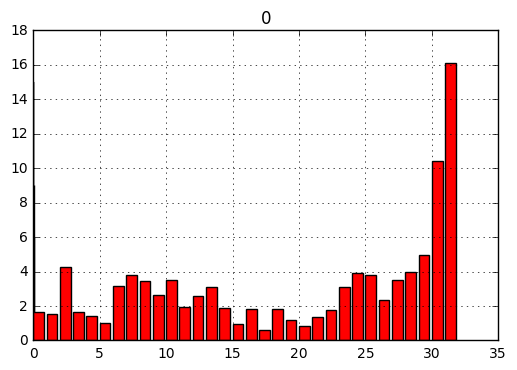

In [72]:
# Features selecting Feature Importance

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

%matplotlib inline
import matplotlib.pyplot as plt


clfscr = RandomForestClassifier(n_estimators=100)
scores = cross_validation.cross_val_score(clfscr, X, Y, cv=8)

clfscr = clfscr.fit(X, Y)
print(clfscr.feature_importances_)

pddq = pd.DataFrame(clfscr.feature_importances_)

pddq.hist()

yy = clfscr.feature_importances_
NN = len(yy)
xx = range(NN)
print (yy)
width = 1/1.5
plt.bar(xx, yy*100, color="red")




In [73]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'PG1', 'PG2'],
      dtype='object')

[  25.429   12.536    4.742   10.479    3.515    0.796   25.3     25.748
    9.954    7.157    8.282    3.054   10.395   15.596  204.93    14.479
    6.086   10.524   12.358    3.329    8.784    5.916   13.683    4.171
    8.877   10.384   34.859   27.108   11.332  279.419  230.617  285.733]
[[ 0  0 13 14]
 [ 0  2 10  9]
 [ 0 10  7 11]
 ..., 
 [ 0  0 14 17]
 [ 0  0 18 18]
 [ 0  2 14 14]]


<Container object of 32 artists>

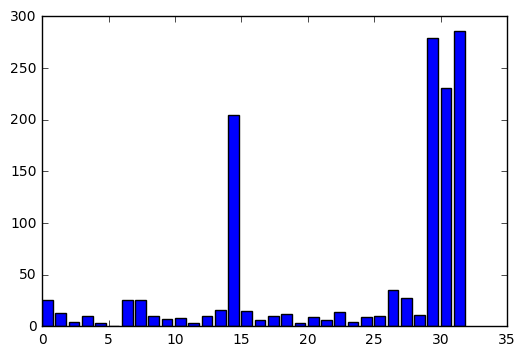

In [74]:
# feature extraction Univariate Selection

testK = SelectKBest(score_func=chi2, k=4)
fit = testK.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[:,:])


yu = fit.scores_
N = len(yu)
x = range(N)
width = 1/1.5
plt.bar(x, yu, color="blue")

In [75]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'PG1', 'PG2'],
      dtype='object')

In [76]:
# feature extraction  Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

5
[ True False False False False False False False False False False False
  True False  True False False False False False  True False False False
 False False  True False False False False False]
[ 1 13  5  2 22 21 26  6 27 16 24 19  1 18  1  9  3 14 10  8  1 23 15 28 20
 17  1 25 11 12  7  4]


In [77]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'PG1', 'PG2'],
      dtype='object')

In [78]:
# feature extraction  PCA

from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print(fit.explained_variance_ratio_)
print(fit.components_)

[ 0.393  0.246  0.055]
[[  2.146e-03   8.577e-03   4.917e-02   1.841e-03   1.261e-03  -7.698e-03
   -2.509e-02  -1.366e-02   3.334e-02   6.067e-03  -1.181e-02  -6.764e-03
    9.790e-03  -3.353e-02   3.818e-02  -4.300e-03  -1.175e-03  -1.786e-03
   -2.779e-03  -2.655e-03  -1.760e-02  -8.317e-04   1.075e-02  -1.621e-02
    6.027e-03   3.503e-02   4.499e-02   6.061e-02  -1.082e-02   9.242e-01
   -2.529e-01  -2.584e-01]
 [  4.682e-02  -1.217e-02  -3.007e-02   2.504e-02  -3.212e-03   7.512e-04
    9.113e-02   7.790e-02  -5.953e-02  -1.490e-02  -4.825e-02   5.990e-03
   -3.547e-02   4.176e-02  -5.703e-02  -9.265e-03   6.768e-03  -2.374e-03
    7.967e-03   4.310e-03   2.073e-02   2.006e-02  -1.047e-02   2.143e-02
   -2.980e-02  -1.953e-02  -3.962e-02  -5.232e-02  -3.067e-02   3.726e-01
    6.150e-01   6.664e-01]
 [  4.454e-02   7.744e-02  -1.333e-01   4.771e-02  -1.563e-02   1.515e-03
    4.340e-01   4.036e-01  -5.659e-01  -2.893e-01  -7.215e-03   2.783e-02
   -8.515e-02  -1.546e-02  -2.793e-

In [79]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'PG1', 'PG2'],
      dtype='object')

In [80]:
#XF = X[['age','failures','absences','PG1','PG2']]
XF = X[['PG1','PG2']]

In [81]:
XF.head()

,PG1,PG2
0,13,14
1,10,9
2,7,11
3,14,15
4,10,11


In [82]:
#using SVM
from sklearn import svm

In [83]:
clfsvm = svm.SVC()
clfsvm.fit(X, Y) 

fsvm = svm.SVC()
fsvm.fit(XF, Y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
scores = cross_validation.cross_val_score(clfsvm, X, Y, cv=8)
print("svm Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


scoresf = cross_validation.cross_val_score(fsvm, XF, Y, cv=8)
print("svm Accuracy: %0.2f (+/- %0.2f)" % (scoresf.mean(), scoresf.std() * 2))


/home/dhiraj/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=8.
  % (min_labels, self.n_folds)), Warning)


svm Accuracy: 0.36 (+/- 0.12)
svm Accuracy: 0.47 (+/- 0.09)


/home/dhiraj/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=8.
  % (min_labels, self.n_folds)), Warning)


In [85]:
# Train classifier Random Forest
#clf = RandomForestClassifier(n_estimators=int(X.shape[1] / 2))
clf = RandomForestClassifier(n_estimators=100)
scores = cross_validation.cross_val_score(clf, X, Y, cv=8)
print("RandomForese Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
clf = clf.fit(X, Y)



# Train classifier Random Forest
#clf = RandomForestClassifier(n_estimators=int(X.shape[1] / 2))
clfF = RandomForestClassifier(n_estimators=100)
scoresF = cross_validation.cross_val_score(clfF, XF, Y, cv=8)
print("RandomForese Accuracy: %0.2f (+/- %0.2f)" % (scoresF.mean(), scoresF.std() * 2))
clfF = clfF.fit(XF, Y)

/home/dhiraj/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=8.
  % (min_labels, self.n_folds)), Warning)


RandomForese Accuracy: 0.41 (+/- 0.19)


/home/dhiraj/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=8.
  % (min_labels, self.n_folds)), Warning)


RandomForese Accuracy: 0.42 (+/- 0.09)


In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X, Y)

gnb = GaussianNB()
gnbF = gnb.fit(XF, Y)



In [87]:
test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,PG1,PG2,PG3
0,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,4,12,11,11
1,GP,M,17,U,LE3,A,3,2,teacher,services,...,4,4,4,3,4,3,18,13,13,13
2,GP,F,17,U,LE3,T,3,2,other,other,...,4,4,4,1,3,1,2,14,16,15
3,MS,M,18,R,GT3,T,3,2,other,other,...,2,5,5,5,5,5,8,9,10,11
4,GP,M,20,U,GT3,A,3,2,services,other,...,5,5,3,1,1,5,0,14,15,15


In [88]:
# Split train set to X(features), Y(labels)
print("\n\nTest set size: %s" % (test.shape,))
toPredictTestSet = test.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'PG1', 'PG2']]

# For Sex, convert male ->1, female -> 0
sex_map = {"M":1, "F":0}
toPredictTestSet.loc[:, "sex"] = toPredictTestSet.loc[:, "sex"].map(sex_map)

# For romantic, convert yes ->1, no -> 0
romantic_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "romantic"] = toPredictTestSet.loc[:, "romantic"].map(romantic_map)

# For internet, convert yes ->1, no -> 0
internet_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "internet"] = toPredictTestSet.loc[:, "internet"].map(internet_map)

# For schoolsup, convert yes ->1, no -> 0
schoolsup_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "schoolsup"] = toPredictTestSet.loc[:, "schoolsup"].map(schoolsup_map)


# For famsup, convert yes ->1, no -> 0
famsup_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "famsup"] = toPredictTestSet.loc[:, "famsup"].map(famsup_map)

# For paid, convert yes ->1, no -> 0
paid_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "paid"] = toPredictTestSet.loc[:, "paid"].map(paid_map)

# For activities, convert yes ->1, no -> 0
activities_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "activities"] = toPredictTestSet.loc[:, "activities"].map(activities_map)

# For nursery, convert yes ->1, no -> 0
nursery_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "nursery"] = toPredictTestSet.loc[:, "nursery"].map(nursery_map)

# For higher, convert yes ->1, no -> 0
higher_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "higher"] = toPredictTestSet.loc[:, "higher"].map(higher_map)

# For school, convert gp ->1, ms -> 0
school_map = {"GP":1, "MS":0}
toPredictTestSet.loc[:, "school"] = toPredictTestSet.loc[:, "school"].map(school_map)

# For address, convert U ->1, R -> 0
address_map = {"U":1, "R":0}
toPredictTestSet.loc[:, "address"] = toPredictTestSet.loc[:, "address"].map(address_map)

# For famsize, convert GT3 ->1, LE3 -> 0
famsize_map = {"GT3":1, "LE3":0}
toPredictTestSet.loc[:, "famsize"] = toPredictTestSet.loc[:, "famsize"].map(famsize_map)


# For Pstatus, convert T ->1, A -> 0
Pstatus_map = {"T":1, "A":0}
toPredictTestSet.loc[:, "Pstatus"] = toPredictTestSet.loc[:, "Pstatus"].map(Pstatus_map)

# For Mjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Mjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
toPredictTestSet.loc[:, "Mjob"] = toPredictTestSet.loc[:, "Mjob"].map(Mjob_map)

# For Fjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Fjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
toPredictTestSet.loc[:, "Fjob"] = toPredictTestSet.loc[:, "Fjob"].map(Fjob_map)

# For reason, convert "home" -> 1 "reputation" ->2 "course" ->3 "other" -> 4
reason_map = {"home":1,"reputation":2,"course":3,"other":4}
toPredictTestSet.loc[:, "reason"] = toPredictTestSet.loc[:, "reason"].map(reason_map)

# For guardian, convert mother ->2, father -> 1 other -> 0
guardian_map = {"mother":2, "father":1, "other":0}
toPredictTestSet.loc[:, "guardian"] = toPredictTestSet.loc[:, "guardian"].map(guardian_map)

toPredictTestSet.to_csv('testView.csv', sep=',')





Test set size: (195, 33)


In [89]:
#predictF = toPredictTestSet[['age','failures','absences','PG1','PG2']]
#predictF = toPredictTestSet[['failures','absences','PG1','PG2']]
predictF = toPredictTestSet[['PG1','PG2']]

In [90]:
resultRF = clf.predict(toPredictTestSet)
resultRFF = clfF.predict(predictF)


resultSVM = clfsvm.predict(toPredictTestSet)
resultSVMF = fsvm.predict(predictF)


#resultGNB = gnb.predict(toPredictTestSet)
resultGNBF = gnb.predict(predictF)

In [91]:
from sklearn.metrics import accuracy_score
y_true = test.loc[:,"PG3"]
print("result accuracy random forest ")
print (accuracy_score(y_true, resultRF))

print("result accuracy random forest with less feature ")
print (accuracy_score(y_true, resultRFF))

print("result accuracy svm")
print (accuracy_score(y_true, resultSVM))

print("result accuracy svm less feaure ")
print (accuracy_score(y_true, resultSVMF))



print("result accuracy naive less feaure ")
print (accuracy_score(y_true, resultGNBF))



result accuracy random forest 
0.425641025641
result accuracy random forest with less feature 
0.471794871795
result accuracy svm
0.389743589744
result accuracy svm less feaure 
0.471794871795
result accuracy naive less feaure 
0.45641025641


In [92]:
prediction = pd.DataFrame({"school":test.loc[:,"school"],"sex":test.loc[:,"sex"],"age":test.loc[:,"age"],"address":test.loc[:,"address"], "famsize":test.loc[:,"famsize"],"Pstatus":test.loc[:,"Pstatus"],"Medu":test.loc[:,"Medu"],"Fedu":test.loc[:,"Fedu"],"Mjob":test.loc[:,"Mjob"],"Fjob":test.loc[:,"Fjob"],"reason":test.loc[:,"reason"],"guardian":test.loc[:,"guardian"], "traveltime":test.loc[:,"traveltime"],"studytime":test.loc[:,"studytime"],"failures":test.loc[:,"failures"], "schoolsup":test.loc[:,"schoolsup"], "famsup":test.loc[:,"famsup"], "paid":test.loc[:,"paid"], "activities":test.loc[:,"activities"],"nursery":test.loc[:,"nursery"],"higher":test.loc[:,"higher"], "internet":test.loc[:,"internet"],"romantic":test.loc[:,"romantic"], "famrel":test.loc[:,"famrel"], "freetime":test.loc[:,"freetime"],"goout":test.loc[:,"goout"], "Dalc":test.loc[:,"Dalc"],"Walc":test.loc[:,"Walc"], "health":test.loc[:,"health"], "PG1":test.loc[:,"PG1"], "PG2":test.loc[:,"PG2"],"predictedMarks": resultSVMF})
prediction.to_csv('result1.csv', index=False)

In [142]:
'''
from sklearn.metrics import accuracy_score
y_true = test.loc[:,"PG3"]
accuracy_score(y_true, result)
'''

0.44102564102564101